Available metrics for plotting: ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)']


<ipython-input-5-b37645728441>:97: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(


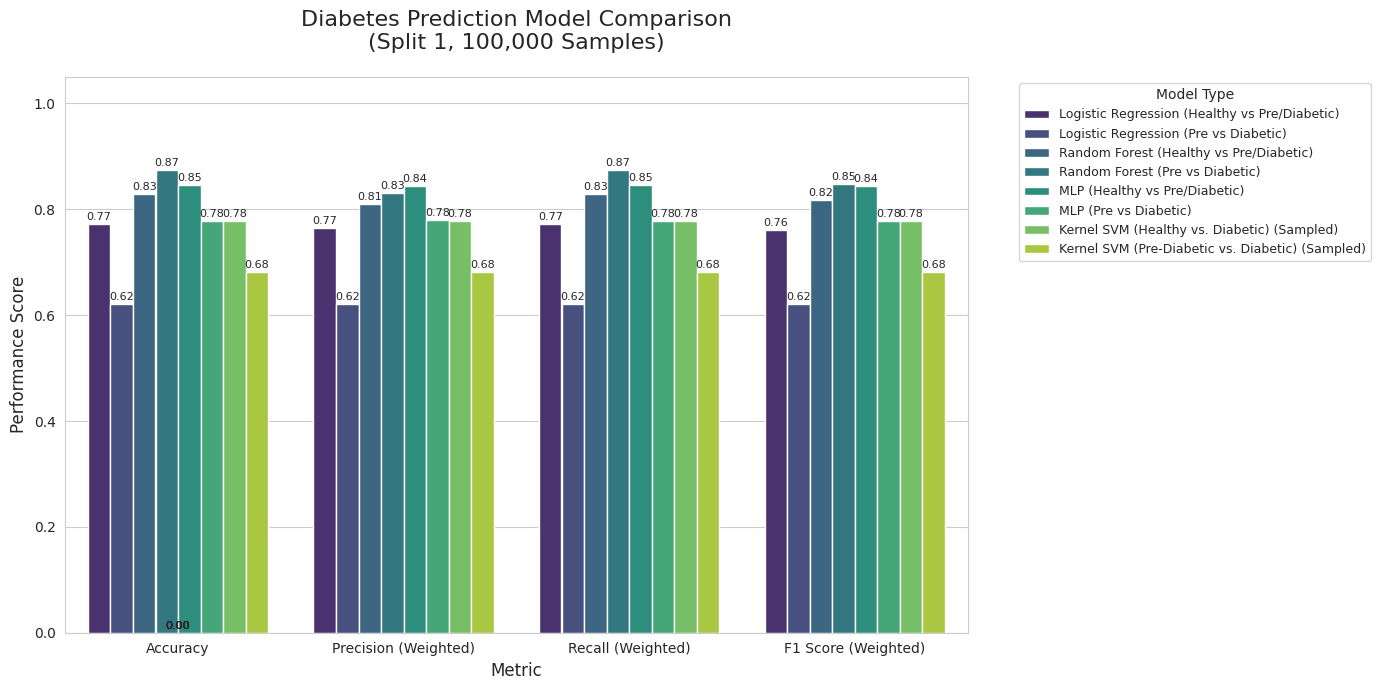

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load all available result files
try:
    # Load logistic regression results
    df_lr = pd.read_csv("logistic_regression_results.csv")

    # Load Random Forest results with column standardization
    df_rf_healthy = pd.read_csv("RF_Healthy_vs_Pre_Diabetic.csv").rename(columns={
        'Precision': 'Precision (Weighted)',
        'Recall': 'Recall (Weighted)',
        'F1 Score': 'F1 Score (Weighted)',
        'F1': 'F1 Score (Weighted)',
        'weighted_precision': 'Precision (Weighted)'
    })

    df_rf_pre = pd.read_csv("RF_Pre_Diabetic_vs_Diabetic.csv").rename(columns={
        'Precision': 'Precision (Weighted)',
        'Recall': 'Recall (Weighted)',
        'F1 Score': 'F1 Score (Weighted)',
        'F1': 'F1 Score (Weighted)',
        'weighted_precision': 'Precision (Weighted)'
    })

    # Load MLP results
    df_mlp_healthy = pd.read_csv("MLP_results_healthy_vs_not.csv")
    df_mlp_pre = pd.read_csv("MLP_results_pre_vs_diabedes.csv")

    # Load SVM results
    df_svm_healthy = pd.read_csv("svm_healthy_vs_diabetic_split1_sampled.csv")
    df_svm_pre = pd.read_csv("svm_results_pre_vs_diabetic_split1_sampled.csv")

    # Combine all results
    results_df = pd.concat([
        df_lr,
        df_rf_healthy,
        df_rf_pre,
        df_mlp_healthy,
        df_mlp_pre,
        df_svm_healthy,
        df_svm_pre
    ], ignore_index=True)

    # Step 2: Clean and prepare the data
    model_mapping = {
        'LogReg_Model1': 'Logistic Regression (Healthy vs Pre/Diabetic)',
        'LogReg_Model2': 'Logistic Regression (Pre vs Diabetic)',
        'RF_Model1': 'Random Forest (Healthy vs Pre/Diabetic)',
        'RF_Model2': 'Random Forest (Pre vs Diabetic)',
        'MLP_Model1': 'MLP (Healthy vs Pre/Diabetic)',
        'MLP_Model2': 'MLP (Pre vs Diabetic)',
        'SVM_Model1': 'SVM (Healthy vs Diabetic)',
        'SVM_Model2': 'SVM (Pre vs Diabetic)'
    }

    results_df['Model_Name'] = results_df['Model'].map(model_mapping).fillna(results_df['Model'])

    # Step 3: Filter for specific conditions
    if 'Split' in results_df.columns and 'Dataset Size' in results_df.columns:
        results_df = results_df[
            (results_df['Split'] == 1) &
            (results_df['Dataset Size'] == 100000)
        ]

    # Step 4: Standardize metric names across all models
    metric_mapping = {
        'Precision': 'Precision (Weighted)',
        'Recall': 'Recall (Weighted)',
        'F1 Score': 'F1 Score (Weighted)',
        'F1': 'F1 Score (Weighted)',
        'weighted_precision': 'Precision (Weighted)',
        'weighted_recall': 'Recall (Weighted)',
        'weighted_f1': 'F1 Score (Weighted)'
    }

    results_df = results_df.rename(columns=metric_mapping)

    # Step 5: Select metrics to compare
    metrics_to_plot = ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)']
    available_metrics = [m for m in metrics_to_plot if m in results_df.columns]
    print("Available metrics for plotting:", available_metrics)  # Debug output

    # Step 6: Melt the dataframe for visualization
    melted_df = results_df.melt(
        id_vars=['Model_Name'],
        value_vars=available_metrics,
        var_name='Metric',
        value_name='Score'
    )

    # Step 7: Create the visualization
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    ax = sns.barplot(
        data=melted_df,
        x='Metric',
        y='Score',
        hue='Model_Name',
        palette='viridis',
        errwidth=1
    )

    plt.title('Diabetes Prediction Model Comparison\n(Split 1, 100,000 Samples)', fontsize=16, pad=20)
    plt.ylabel('Performance Score', fontsize=12)
    plt.xlabel('Metric', fontsize=12)
    plt.ylim(0, 1.05)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adjust legend
    plt.legend(
        title='Model Type',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=9,
        title_fontsize=10
    )

    # Add value labels
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=8
        )

    plt.tight_layout()
    plt.savefig('model_comparison_results.png', dpi=300, bbox_inches='tight')
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}. Please check if all files are in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")